In [2]:
# conda install -c conda-forge sahi

In [2]:
#! pip install sahi --quiet
from sahi.utils.coco import Coco, CocoCategory, CocoImage, CocoAnnotation
from sahi.utils.file import save_json

In [27]:
save_json(data=coco.json, save_path= "train.json")

# Create a COCO file for our data - 1. LOADING DATA

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
from pathlib import Path
os.chdir(Path(os.path.abspath("")).parent)


In [5]:
cd /Users/antoniskrobisz/Desktop/DTU/Sem3/Deep learning/Project/Untitled Folder/mros-data/

/Users/antoniskrobisz/Desktop/DTU/Sem3/Deep learning/Project/Untitled Folder/mros-data


In [6]:
ls

README.md           examples/           mros_data.egg-info/ tests/
data/               mros_data/          setup.py


In [7]:
pip install -e .

Obtaining file:///Users/antoniskrobisz/Desktop/DTU/Sem3/Deep%20learning/Project/Untitled%20Folder/mros-data
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mros-data
    Found existing installation: mros-data 0.0.0
    Uninstalling mros-data-0.0.0:
      Successfully uninstalled mros-data-0.0.0
  Running setup.py develop for mros-data
Note: you may need to restart the kernel to use updated packages.


In [8]:
cd /Users/antoniskrobisz/Desktop/DTU/Sem3/Deep learning/Project/Untitled Folder

/Users/antoniskrobisz/Desktop/DTU/Sem3/Deep learning/Project/Untitled Folder


In [9]:
from mros_data.datamodule import SleepEventDataModule
# from mros_data.datamodule.event_datamodule import SleepEventDataModule

11/21/2022 16:16:10 - INFO - torch.distributed.nn.jit.instantiator -   Created a temporary directory at /var/folders/09/h3x032dj5374s44nl0yv8k3h0000gn/T/tmp9u5k72uc
11/21/2022 16:16:10 - INFO - torch.distributed.nn.jit.instantiator -   Writing /var/folders/09/h3x032dj5374s44nl0yv8k3h0000gn/T/tmp9u5k72uc/_remote_module_non_scriptable.py


In [78]:
from mros_data.datamodule.transforms import STFTTransform

In [10]:
from mros_data.datamodule.transforms import STFTTransform

params = dict(
    data_dir="data/processed/mros/sdb",
    batch_size=1,
    n_eval=15,
    n_test=0,
    num_workers=0,
    seed=1337,
    events={"sdb": "Sleep-disordered breathing"},
    window_duration=600,  # seconds
    cache_data=True,
    default_event_window_duration=[15],
    event_buffer_duration=3,
    factor_overlap=2,
    fs=64,
    matching_overlap=0.5,
    n_jobs=-1,
    n_records=50,
    picks=["nasal", "abdo", "thor"],
    # transform=MultitaperTransform(128, 0.5, 35.0, tw=8.0, normalize=True),
    # transform=STFTTransform(
    #     fs=64, segment_size=int(4.0 * 64), step_size=int(0.125 * 64), nfft=1024, normalize=True
    # ),
    scaling="robust",
)
dm = SleepEventDataModule(**params)
print(dm)

SleepEventDataModule(data_dir=PosixPath('/Users/antoniskrobisz/Desktop/DTU/Sem3/Deep learning/Project/Untitled Folder/data/processed/mros/sdb'), n_test=0, n_eval=15, seed=1337, events={'sdb': 'Sleep-disordered breathing'}, window_duration=600, cache_data=True, default_event_window_duration=[15], event_buffer_duration=3, factor_overlap=2, fs=64, matching_overlap=0.5, n_jobs=-1, n_records=50, picks=['nasal', 'abdo', 'thor'], transform=None, scaling='robust', batch_size=1, num_workers=0)


In [13]:
# The datamodule will split the dataset into train/eval partitions by calling the setup() method.
dm.setup('fit')
train_dl, eval_dl = dm.train_dataloader(), dm.val_dataloader()

# The dataloaders are generators, ie. we can iterate over them using a for-loop.
for i, (data, events, records, *_) in enumerate(train_dl):
    if i < 1:
        print(f'Batch size: {data.shape[0]} | No. channels: {data.shape[1]} | No. timepoints {data.shape[2]} | No. events: {sum([ev.shape[0] for ev in events])} | Data sample size: {list(data.shape[1:])} ')
    break

Using cache for data prep: /Users/antoniskrobisz/Desktop/DTU/Sem3/Deep learning/Project/Untitled Folder/data/.cache


100%|███████████████████████████████████████████| 35/35 [00:03<00:00, 11.52it/s]


Using cache for data prep: /Users/antoniskrobisz/Desktop/DTU/Sem3/Deep learning/Project/Untitled Folder/data/.cache


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 1156.88it/s]

Batch size: 1 | No. channels: 3 | No. timepoints 38400 | No. events: 0 | Data sample size: [3, 38400] 


In [174]:
# dm.test

In [171]:
# test_dl = dm.test_dataloader()

In [14]:

train_ds = dm.train
for idx, batch in enumerate(train_ds):
    record = batch['record']
    data = batch['signal']
    events = batch['events']
    if len(events) > 5:
        break
print(batch.keys())
print(f'Record: {record} | No. channels: {data.shape[0]} | No. timepoints: {data.shape[1]} | No. events: {len(events)}')

dict_keys(['signal', 'events', 'stages', 'record', 'localizations_target', 'classifications_target'])
Record: mros-visit1-aa0052 | No. channels: 3 | No. timepoints: 38400 | No. events: 7


In [15]:
len(train_ds)

4365

In [16]:
len(dm.eval)

1901

In [193]:
# len(dm.test)

In [197]:
# batch

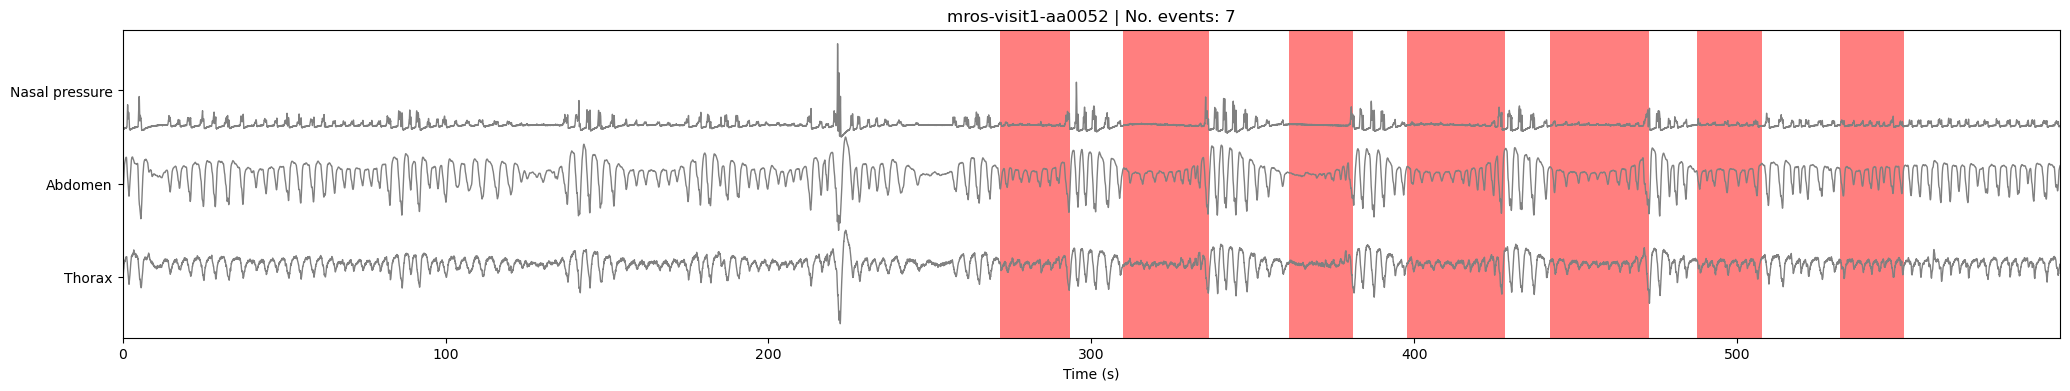

In [17]:
train_ds.plot_signals(idx, channel_names=["Nasal pressure", "Abdomen", "Thorax"])

In [18]:
eval_ds = dm.eval


In [214]:
# eval_ds

In [25]:
eval_ds.fs*4

256

In [27]:
eval_ds.get_spect(idx, channel_idx=0, window_size=int(4.0 * eval_ds.fs), step_size=int(0.125 * eval_ds.fs), nfft=1024).shape


(513, 4801)

In [29]:
import numpy as np
from PIL import Image

# create image from channels
image_ex = np.zeros((3, 4801, 513))
ch0_ex = train_ds.get_spect(idx, channel_idx=0, window_size=int(4.0 * train_ds.fs), step_size=int(0.125 * train_ds.fs), nfft=1024)
ch1_ex = train_ds.get_spect(idx, channel_idx=1, window_size=int(4.0 * train_ds.fs), step_size=int(0.125 * train_ds.fs), nfft=1024)
ch2_ex = train_ds.get_spect(idx, channel_idx=2, window_size=int(4.0 * train_ds.fs), step_size=int(0.125 * train_ds.fs), nfft=1024)
image_ex[0,:,:] = ch0_ex.T
image_ex[1,:,:] = ch1_ex.T
image_ex[2,:,:] = ch2_ex.T

In [30]:
im = Image.fromarray(image_ex.T, 'RGB')

In [31]:
im.save("spektprzyklad"+".jpeg", "JPEG")

In [34]:
image_ex[0,:,:] = 0
image_ex[1,:,:] = ch1_ex.T
image_ex[2,:,:] = 0

In [35]:
im = Image.fromarray(image_ex.T, 'RGB')
im.save("spektprzyklad_ch1"+".jpeg", "JPEG")

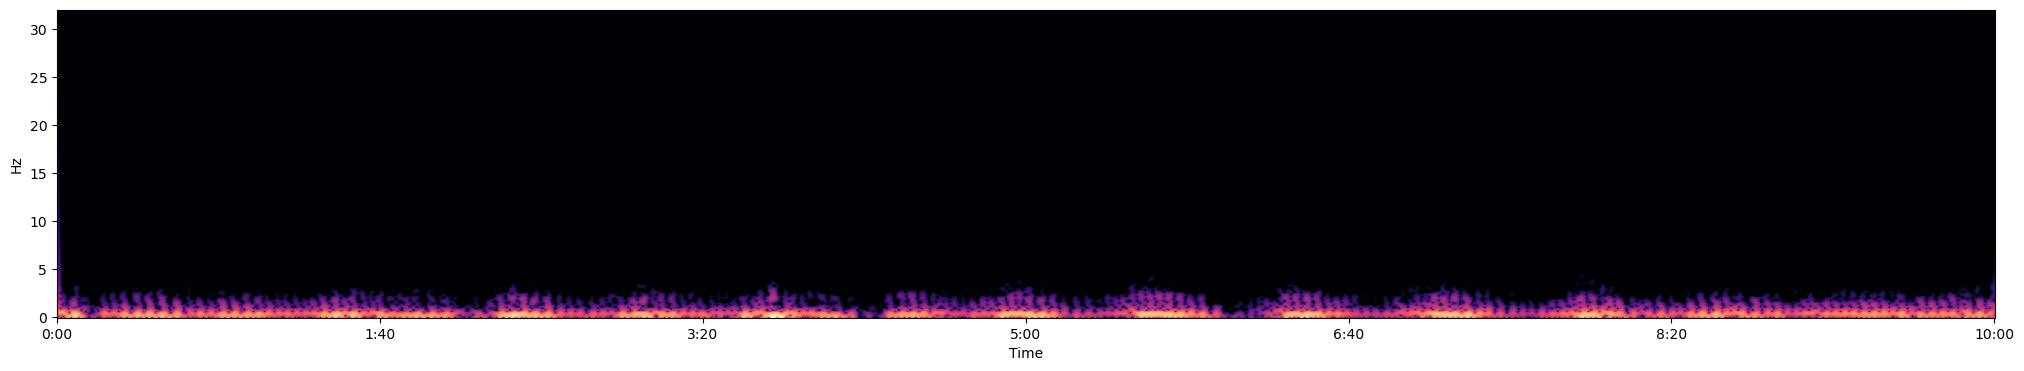

In [39]:
train_ds.plot_spect(idx, channel_idx=1, window_size=int(4.0 * train_ds.fs), step_size=int(0.125 * train_ds.fs), nfft=1024)

# Loop for the image loading and creating coco file - Carol's code with our addition

In [233]:
coco_train = Coco()
coco_test = Coco()

In [234]:
coco_train.add_category(CocoCategory(id=0, name='sdb_event'))
coco_test.add_category(CocoCategory(id=0, name='sdb_event'))

In [235]:
import numpy as np
from PIL import Image


In [236]:
# train_ds = dm.train

record_counter = 0 # this is a counter so see which patient we are getting the data from (out of n_records [50])
last_record = '' # this variable is just to check if the last iteration was the same or a different patient
counter = 1 # this is a counter to get all the files of a different patient with a different ID

for idx, batch in enumerate(train_ds):

    record = batch['record'] # this gets the patient in which it is
    data = batch['signal'] # this is the signal
    events = batch['events'] # this, im assuming, is the labels

    # here we check if the patient is the same as last iteration to name the image correctly
    if record == last_record:
        counter += 1
    else:
        counter = 1
        record_counter += 1
        print(record_counter)

    # here we get the three channels of the same segment and subsample them from (513, 4801) to size (513, 686)
    ch0 = train_ds.get_spect(idx, channel_idx=0, window_size=int(4.0 * train_ds.fs), step_size=int(0.125 * train_ds.fs), nfft=1024)
    ch0_sub = ch0[::1, ::7]
    ch1 = train_ds.get_spect(idx, channel_idx=1, window_size=int(4.0 * train_ds.fs), step_size=int(0.125 * train_ds.fs), nfft=1024)
    ch1_sub = ch1[::1, ::7]
    ch2 = train_ds.get_spect(idx, channel_idx=2, window_size=int(4.0 * train_ds.fs), step_size=int(0.125 * train_ds.fs), nfft=1024)
    ch2_sub = ch2[::1, ::7]

    # create image from channels
    image = np.zeros((3, 686, 513))
    image[0,:,:] = ch0_sub.T
    image[1,:,:] = ch1_sub.T
    image[2,:,:] = ch2_sub.T

    # save image in the folder of the corresponding record
    path = "/Users/antoniskrobisz/Desktop/DTU/Sem3/Deep learning/Project/Untitled Folder/images_subsampled_train" + record
    if not os.path.exists(path): # make directory if it doesn't exist
            os.makedirs(path)
    im = Image.fromarray(image.T, 'RGB')
    im.save("/Users/antoniskrobisz/Desktop/DTU/Sem3/Deep learning/Project/Untitled Folder/images_subsampled_train" +record + "/" + record + "_segment" + str(counter) + ".jpeg", "JPEG")
    
    #-------------------------------------------------------
    im_name = record + "_segment" + str(counter) + ".jpeg"
    
    #COCO
    width, height = (686, 513)
    coco_image = CocoImage(file_name=im_name, height=height, width=width)
    
    for event_start, event_end, event_type in batch['events']:
        x_min, y_min , box_width, box_height = max(0,int(event_start*width)), 0, int(event_end*width - event_start*width), height

        coco_image.add_annotation(
            CocoAnnotation(
            bbox=[x_min, y_min, box_width, box_height],
            category_id=0,
            category_name='sdb_event'
            ))
            
    coco_train.add_image(coco_image)
            
    #-------------------------------------------------------
    
    last_record = record # set the current patient name as the last patient name

    
record_counter = 0 # this is a counter so see which patient we are getting the data from (out of n_records [50])
last_record = '' # this variable is just to check if the last iteration was the same or a different patient
counter = 1 # this is a counter to get all the files of a different patient with a different ID
    
for idx, batch in enumerate(eval_ds):

    record = batch['record'] # this gets the patient in which it is
    data = batch['signal'] # this is the signal
    events = batch['events'] # this, im assuming, is the labels

    # here we check if the patient is the same as last iteration to name the image correctly
    if record == last_record:
        counter += 1
    else:
        counter = 1
        record_counter += 1
        print(record_counter)

    # here we get the three channels of the same segment and subsample them from (513, 4801) to size (513, 686)
    ch0 = eval_ds.get_spect(idx, channel_idx=0, window_size=int(4.0 * eval_ds.fs), step_size=int(0.125 * eval_ds.fs), nfft=1024)
    ch0_sub = ch0[::1, ::7]
    ch1 = eval_ds.get_spect(idx, channel_idx=1, window_size=int(4.0 * eval_ds.fs), step_size=int(0.125 * eval_ds.fs), nfft=1024)
    ch1_sub = ch1[::1, ::7]
    ch2 = eval_ds.get_spect(idx, channel_idx=2, window_size=int(4.0 * eval_ds.fs), step_size=int(0.125 * eval_ds.fs), nfft=1024)
    ch2_sub = ch2[::1, ::7]

    # create image from channels
    image = np.zeros((3, 686, 513))
    image[0,:,:] = ch0_sub.T
    image[1,:,:] = ch1_sub.T
    image[2,:,:] = ch2_sub.T

    # save image in the folder of the corresponding record
    path = "/Users/antoniskrobisz/Desktop/DTU/Sem3/Deep learning/Project/Untitled Folder/images_subsampled_test" + record
    if not os.path.exists(path): # make directory if it doesn't exist
            os.makedirs(path)
    im = Image.fromarray(image.T, 'RGB')
    im.save("/Users/antoniskrobisz/Desktop/DTU/Sem3/Deep learning/Project/Untitled Folder/images_subsampled_test" +record + "/" + record + "_segment" + str(counter) + ".jpeg", "JPEG")
    
    #-------------------------------------------------------
    im_name = record + "_segment" + str(counter) + ".jpeg"
    
    #COCO
    width, height = (686, 513)
    coco_image = CocoImage(file_name=im_name, height=height, width=width)
    
    for event_start, event_end, event_type in batch['events']:
        x_min, y_min , box_width, box_height = max(0,int(event_start*width)), 0, int(event_end*width - event_start*width), height

        coco_image.add_annotation(
            CocoAnnotation(
            bbox=[x_min, y_min, box_width, box_height],
            category_id=0,
            category_name='sdb_event'
            ))
            
    coco_test.add_image(coco_image)
            
    #-------------------------------------------------------
    
    last_record = record # set the current patient name as the last patient name
    

print(batch.keys())
print(f'Record: {record} | No. channels: {data.shape[0]} | No. timepoints: {data.shape[1]} | No. events: {len(events)}')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
dict_keys(['signal', 'events', 'stages', 'record', 'localizations_target', 'classifications_target'])
Record: mros-visit1-aa0107 | No. channels: 3 | No. timepoints: 38400 | No. events: 0


In [237]:
save_json(data=coco_train.json, save_path= "train.json")
save_json(data=coco_test.json, save_path= "test.json")

In [238]:
ls

Archive.zip
Untitled.ipynb
Untitled1.ipynb
data/
images_subsampledmros-visit1-aa0001/
images_subsampledmros-visit1-aa0001.zip
mros-data/
mros-visit1-aa0001.h5
sdb.ipynb
test/
test.json
train/
train.json
transform_to_coco_CD.ipynb


In [1]:
eval_ds.get_spect(idx, channel_idx=0, window_size=int(4.0 * eval_ds.fs), step_size=int(0.125 * eval_ds.fs), nfft=1024)

NameError: name 'eval_ds' is not defined